Enter the square footage of the house: 2459
Enter the number of bedrooms: 3
Enter the number of bathrooms: 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted Price for the house: $267283.6213103088
Mean Squared Error: 2437457422.9701114
Mean Absolute Error: 39436.44027468767
R-squared: 0.5753523993584164


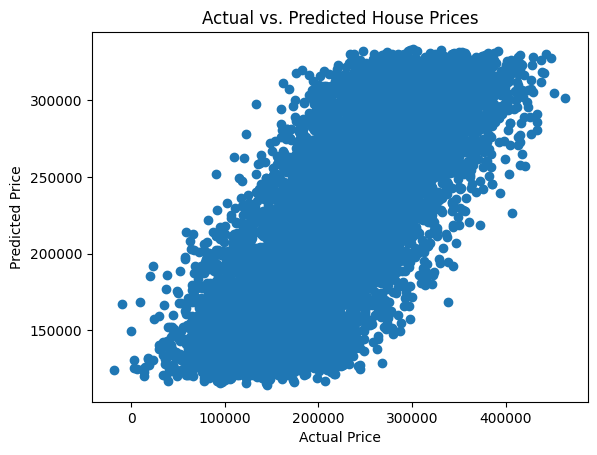

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

def train_and_evaluate_model(dataset_path):
    # Load the dataset
    data = pd.read_csv(dataset_path)  # Assuming the dataset is in CSV format

    # Split the data into features (X) and target variable (y)
    X = data[['SquareFeet', 'Bedrooms', 'Bathrooms']]
    y = data['Price']

    # Create a pipeline with StandardScaler and Linear Regression
    model = make_pipeline(StandardScaler(), LinearRegression())

    # Train the model
    model.fit(X, y)

    return model

def predict_house_price(model):
    square_feet = float(input("Enter the square footage of the house: "))
    bedrooms = int(input("Enter the number of bedrooms: "))
    bathrooms = int(input("Enter the number of bathrooms: "))

    input_data = np.array([[square_feet, bedrooms, bathrooms]])
    predicted_price = model.predict(input_data)

    return predicted_price

# Evaluate the model with test data and visualize actual vs. predicted prices
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R-squared: {r2}')

    # Visualization of actual vs. predicted prices
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs. Predicted House Prices')
    plt.show()

# Example usage:
dataset_path = '/content/housing_price_dataset.csv'
data = pd.read_csv(dataset_path)
X_train, X_test, y_train, y_test = train_test_split(data[['SquareFeet', 'Bedrooms', 'Bathrooms']], data['Price'], test_size=0.2, random_state=42)

trained_model = train_and_evaluate_model(dataset_path)

predicted_price = predict_house_price(trained_model)
print(f'Predicted Price for the house: ${predicted_price[0]}')

evaluate_model(trained_model, X_test, y_test)